<a href="https://colab.research.google.com/github/Hereum/Quant-Project/blob/main/20days_Rolling_Vol_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [4]:
etf = yf.Ticker('SPY')
data = etf.history(start = '2000-01-01', end = '2025-01-01', actions = False)
data.drop(['High', 'Open', 'Low', 'Volume'], inplace=True, axis=1)

In [9]:
data.head()

,Close
Date,
2000-01-03 00:00:00-05:00,92.692924
2000-01-04 00:00:00-05:00,89.068092
2000-01-05 00:00:00-05:00,89.227409
2000-01-06 00:00:00-05:00,87.793396
2000-01-07 00:00:00-05:00,92.892044


In [10]:
rets = data.pct_change().fillna(0)

In [11]:
rets

,Close
Date,
2000-01-03 00:00:00-05:00,0.000000
2000-01-04 00:00:00-05:00,-0.039106
2000-01-05 00:00:00-05:00,0.001789
2000-01-06 00:00:00-05:00,-0.016071
2000-01-07 00:00:00-05:00,0.058076
...,...
2024-12-24 00:00:00-05:00,0.011115
2024-12-26 00:00:00-05:00,0.000067
2024-12-27 00:00:00-05:00,-0.010527


In [13]:
param = 20
vols = rets.rolling(param).std() * np.sqrt(252)

In [14]:
vols

,Close
Date,
2000-01-03 00:00:00-05:00,NaN
2000-01-04 00:00:00-05:00,NaN
2000-01-05 00:00:00-05:00,NaN
2000-01-06 00:00:00-05:00,NaN
2000-01-07 00:00:00-05:00,NaN
...,...
2024-12-24 00:00:00-05:00,0.139521
2024-12-26 00:00:00-05:00,0.138412
2024-12-27 00:00:00-05:00,0.143250


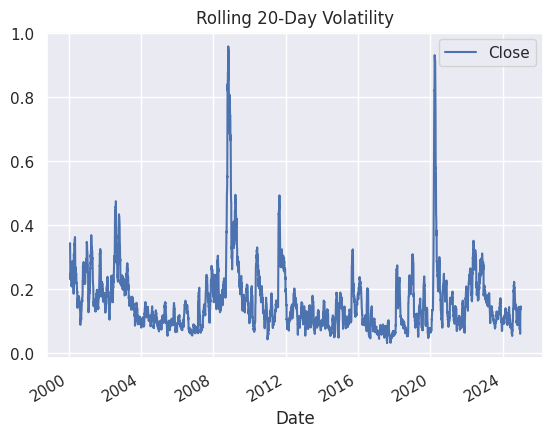

In [15]:
vols.plot()
plt.title('Rolling 20-Day Volatility')
plt.show()

In [16]:
param = 60
vols_3m = rets.rolling(param).std() * np.sqrt(252)

<Axes: xlabel='Date'>

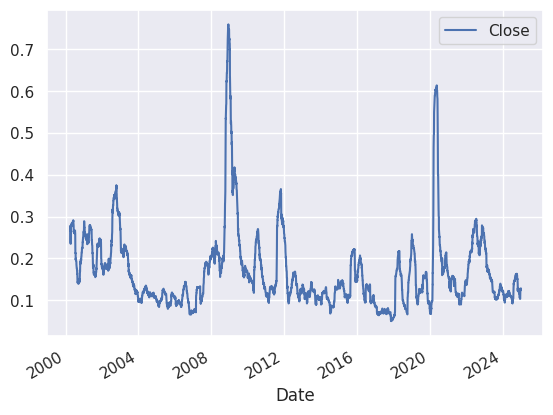

In [17]:
vols_3m.plot()